## Compter les données manquantes dans une série temporelle

In [1]:
import pandas as pd
import numpy as np

On crée une série temporelle en utilisant ``date_range`` et ``numpy.random.randint``

In [2]:
time = pd.date_range("01-Jan-2023", "31-Jan-2023", freq="1H")
data = np.random.randint(0, 500, size=time.size)
timeseries = pd.Series(data=data, index=time)
timeseries

2023-01-01 00:00:00    353
2023-01-01 01:00:00    201
2023-01-01 02:00:00    170
2023-01-01 03:00:00    124
2023-01-01 04:00:00    105
                      ... 
2023-01-30 20:00:00    153
2023-01-30 21:00:00    234
2023-01-30 22:00:00    111
2023-01-30 23:00:00    495
2023-01-31 00:00:00    196
Freq: H, Length: 721, dtype: int64

<Axes: >

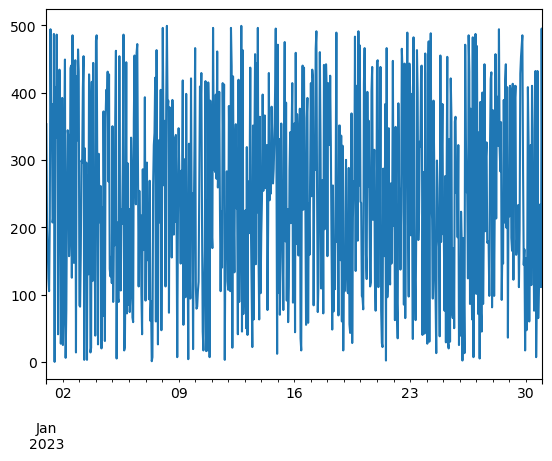

In [3]:
timeseries.plot()

On crée un vecteur d'indices pour allouer artificiellement des données manquantes (``np.nan``) dans la série temporelle

In [4]:
indices = np.random.randint(0, time.size, size=200)
unique_indices = np.unique(indices)
unique_indices

array([  0,   1,  13,  24,  27,  33,  38,  39,  43,  45,  46,  48,  55,
        56,  63,  68,  78,  84,  85,  89,  94,  95, 105, 108, 115, 116,
       119, 120, 123, 140, 146, 155, 161, 162, 174, 177, 190, 195, 197,
       199, 202, 207, 208, 209, 214, 215, 220, 226, 229, 230, 234, 235,
       237, 242, 250, 254, 268, 270, 277, 278, 280, 282, 284, 285, 291,
       293, 294, 299, 300, 303, 308, 309, 311, 316, 321, 328, 333, 339,
       341, 342, 356, 358, 367, 371, 375, 376, 378, 382, 383, 392, 395,
       404, 406, 410, 416, 417, 420, 423, 426, 427, 431, 437, 439, 445,
       447, 448, 450, 456, 463, 464, 465, 471, 479, 484, 492, 504, 508,
       512, 515, 517, 520, 524, 527, 538, 539, 540, 541, 543, 544, 552,
       566, 569, 572, 574, 575, 577, 579, 584, 585, 607, 609, 610, 614,
       619, 622, 624, 633, 634, 644, 646, 647, 648, 649, 651, 665, 668,
       671, 682, 685, 688, 690, 698, 699, 703, 704, 705, 710, 711, 712,
       715])

In [5]:
timeseries_with_nan = timeseries.copy()
timeseries_with_nan.iloc[indices] = np.nan

<Axes: >

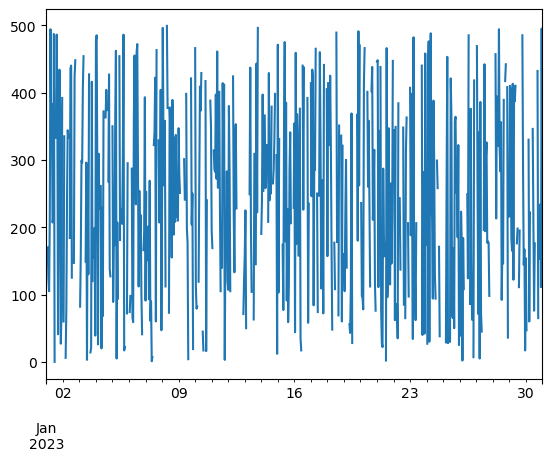

In [6]:
timeseries_with_nan.plot()

On crée une fonction pour compter le nbre de données horaires manquantes par jour

In [7]:
def count_nan(values):
    isnan = np.isnan(values)
    ratio_nan_per_day = 100 * isnan.sum()/values.size
    return ratio_nan_per_day

In [8]:
daily_timeseries_count_nan = timeseries_with_nan.resample(rule="1D").apply(count_nan)
daily_timeseries_count_nan

2023-01-01    12.500000
2023-01-02    33.333333
2023-01-03    20.833333
2023-01-04    25.000000
2023-01-05    20.833333
2023-01-06    12.500000
2023-01-07    16.666667
2023-01-08    12.500000
2023-01-09    37.500000
2023-01-10    29.166667
2023-01-11    12.500000
2023-01-12    33.333333
2023-01-13    37.500000
2023-01-14    16.666667
2023-01-15    20.833333
2023-01-16    29.166667
2023-01-17    16.666667
2023-01-18    33.333333
2023-01-19    25.000000
2023-01-20    25.000000
2023-01-21     8.333333
2023-01-22    33.333333
2023-01-23    25.000000
2023-01-24    25.000000
2023-01-25    16.666667
2023-01-26    25.000000
2023-01-27    25.000000
2023-01-28    25.000000
2023-01-29    16.666667
2023-01-30    37.500000
2023-01-31     0.000000
Freq: D, dtype: float64

In [27]:
daily_timeseries_count_nan.index[0]

Timestamp('2023-01-01 00:00:00')

#### On ``upsample`` la série journalière pour la remettre à la résolution de la série temporelle originale

In [32]:
daily_timeseries_upsampled = daily_timeseries_count_nan.resample(rule="1H").ffill()

On effectue une opération sur la série temporelle originale, exclusivement pour les jours où la proportion de données manquantes est inférieure à 20 %

In [33]:
timeseries_with_nan[daily_timeseries_upsampled < 20] = timeseries_with_nan[daily_timeseries_upsampled < 20] * 0.5

---

#### Autre méthode : on reformate l'indice de temps dans la série journalière de telle sorte que l'on puisse aller chercher les valeurs correspondants aux jours dans la série originale

In [23]:
daily_timeseries = daily_timeseries_count_nan.copy()
daily_timeseries.index = daily_timeseries_count_nan.index.strftime('%Y-%m-%d')

In [25]:
timeseries_with_nan.loc[daily_timeseries.index[0]]

2023-01-01 00:00:00      NaN
2023-01-01 01:00:00      NaN
2023-01-01 02:00:00    170.0
2023-01-01 03:00:00    124.0
2023-01-01 04:00:00    105.0
2023-01-01 05:00:00    214.0
2023-01-01 06:00:00    494.0
2023-01-01 07:00:00    353.0
2023-01-01 08:00:00    383.0
2023-01-01 09:00:00    207.0
2023-01-01 10:00:00    214.0
2023-01-01 11:00:00    487.0
2023-01-01 12:00:00      0.0
2023-01-01 13:00:00      NaN
2023-01-01 14:00:00    333.0
2023-01-01 15:00:00    486.0
2023-01-01 16:00:00    359.0
2023-01-01 17:00:00     41.0
2023-01-01 18:00:00    259.0
2023-01-01 19:00:00    434.0
2023-01-01 20:00:00    372.0
2023-01-01 21:00:00     27.0
2023-01-01 22:00:00     76.0
2023-01-01 23:00:00    392.0
Freq: H, dtype: float64